# Sparse Matrices

---
**References**
- Advanced
 
 >1. Section 2 and 3 of [A Survey of Direct Methods for Sparse Linear Systems](http://faculty.cse.tamu.edu/davis/publications_files/survey_tech_report.pdf) by Davis et. al.
 >1. Algorithms for Sparse Linear Systems, Jennifer Scott, Miroslav Tuma, Springer Publications.[Free download](https://link.springer.com/book/10.1007/978-3-031-25820-6)
 >1. Iterative Methods for Sparse Linear Systems, Yousef Saad. ([Online](https://www-users.cs.umn.edu/~saad/IterMethBook_2ndEd.pdf))
 
- Other Resources  
 >1. [SciPy Sparse Documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html)
 >1. Read the [blog](https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/) by David Ziganto for a comparison between sparse and dense representations of the data matrix in machine learning.
 >1. Another [blog](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/) by Jason Brownlee.
 >1. [WikiPedia: Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix)

<br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

import time

np.random.seed(100)
%matplotlib inline

<div class="alert alert-success">
<strong>Sparse matrices</strong> have higher fraction of zero elements than nonzero elements. Generally the number of nonzero (NNZ) elements in a sparse matrix are of the order $\mathcal{O}(n)$, in place of $\mathcal{O}(n^2)$, for an $n\times n$ matrix.

<br>

$$\textrm{sparsity}(A) = \frac{\# (a_{ij}=0)}{m \times n} = 1 - \textrm{density(A)}
$$ </div>
<br>
<strong>Need for sparse data structure</strong>

>- Better Memory Management as smaller percentage of RAM is needed to load only the non-zero elements of a matrix with appropriate data structure.
>- Computational Efficiency resulting from avoiding operations with zero elments.

<br><br>

### Visualization of a sparse matrix.
---
The Matplotlib function **spy()** could be used to visualize a sparse matrix and its sparsity and structure (or lack thereof).

--- 
#### Example of a **structured** sparse matrix.

<img src='https://live.staticflickr.com/65535/54009716636_df3704f585.jpg' width='50%' />

 

 #### Visualization of the adjacency matrix of the undirected graph above. 

<img src='https://live.staticflickr.com/65535/54010042534_9fdfcd3d5c_n.jpg' width='30%' />

[Image Credit: Saad](https://www-users.cs.umn.edu/~saad/IterMethBook_2ndEd.pdf)

<br>

<span style='font-size:50px;'>&#129300;</span> Can you think of some other sources of structured sparse matrices?

---
#### Visualization of a randomly generated sparse matrix (**unstructured**). [See this](https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/)

**Binomial Distribution** Probability of $k$ successes out of $n$ Bernoulli trials with parameter $p$:

$$\Large
p(k) = C(n,k) ~p^k ~(1-p)^{n-k}
$$

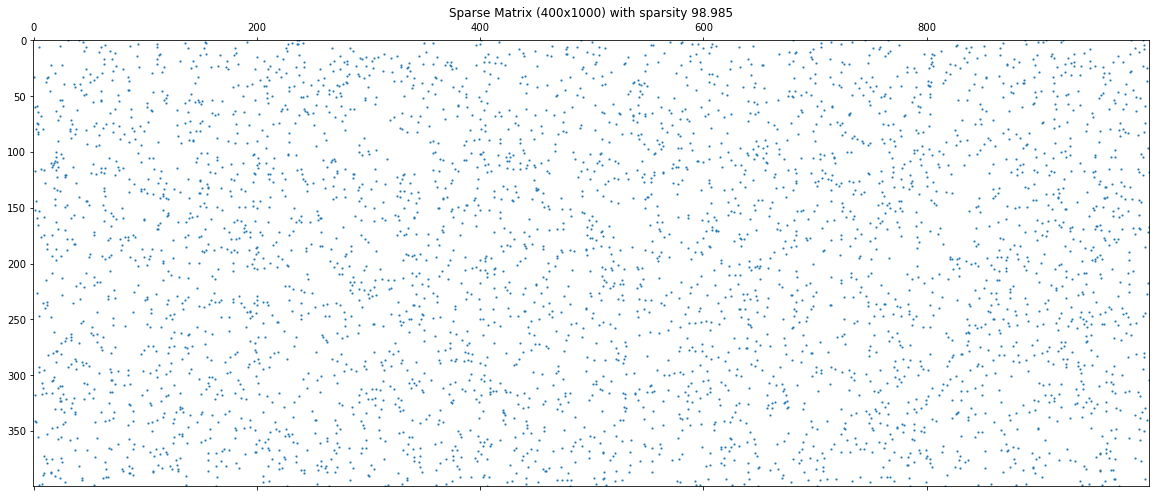

In [47]:
# Data randomly generated with binomial distribution
data = np.random.binomial(1, 0.01, 400000).reshape(400,1000)
#print(data[100:110,100:110])
density = 100*csr_matrix(data).getnnz()/400000
plt.figure(figsize=(20,10))
#plt.axis("off")
plt.spy(data, marker='s', markersize=1)
plt.title("Sparse Matrix (400x1000) with sparsity "+format(100-density));

<br>

<span style='font-size:50px;'>&#129300;</span> How does the sparsity change when you change the parameters of the distribution? Experient and observe.

<br>
<span style='font-size:50px;'>&#129300;</span> Can you think of some other sources of unstructured sparse matrices?

### Comparison of storage sparse vs. dense data structure.

In [8]:
# Data randomly generated with binomial distribution
data = np.random.binomial(1, 0.001, 50000000).reshape(5000,10000)
sparse_dataset = csr_matrix(data)
full_size = data.nbytes/(1024**2)
csr_size = sparse_dataset.data.size/(1024**2)
density = 100*sparse_dataset.getnnz()/50000000
print("Sparsity = ",100-density,"%")
print('Size of full matrix with zeros: '+ '%3.2f' %full_size + ' MB')
print('Size of CSR matrix: '+ '%3.2f' %csr_size + ' MB')

Sparsity =  99.899914 %
Size of full matrix with zeros: 381.47 MB
Size of CSR matrix: 0.05 MB


### Data-structure for sparse matrices
---
- For efficient creation and  modification

  - Dictionary of Keys (DOK): {(row, col):val,...}
  
  - List of Lists (LIL):
  
  - Coordinate Lists (COO): {(row, col, val),...} ideally sorted by row and column.

- For efficient access and operations

  - Compressed Sparse Row (CSR)
  
  - Compressed Sparse Column (CSC)


### List of Lists Format
---

<img src="https://live.staticflickr.com/65535/53998789890_e3c9e2f577_c.jpg" width="100%" />

### Coordinate List (COO)
---
COO stores the row-indices, column indices and nonzero entries of the sparse matrix as separate arrays.

<img src="https://live.staticflickr.com/65535/53998360191_592bcf5aee_b.jpg" width="100%" />



### Compressed Sparse Row (CSR) representation
---
Three one-dimensional arrays: VAL, COL-INDEX, and ROW-INDEX. To populate these arrays. We move from top-left corner of the matrix and traverse through all nonzero element along every column from left to right and every row from top to bottom. See the example from class. 

<img src="https://live.staticflickr.com/65535/53997467217_b0bc4d4e82_b.jpg" width="100%" />
<br><br>

#### Salient points of CSR representation

---

[See Here](https://www.cs.emory.edu/~cheung/Courses/255/Syllabus/C/C.-ver1/C-Advanced/sparse.html)

- First value in ROW-INDEX = 0, last value = NNZ, number of rows = length - 1.
- Accessing row elements are easy but not the column elements.
- Fast row access allows fast matrix-vector multiplication.
- The data-structure has consecutively located entries from rows leading to efficient row-slicing.
- No ordering of the columns are required.
- NNZ floating points and NNZ+N+1 intgers storage is required.
- Slow column-slicing. Better to use Compressed Sparse Columns (CSC) which is the CSR for $A^T$.
- Changes to sparsity structure is expensive. Use List of List (LIL) or Dictionary of Keys (DoK) in this case.
- Saves memory only when number of nonzero elements, $NNZ < \frac{m(n-1)-1}{2}$.


<strong>NOTE</strong>: Compressed sparse column (CSC) representation is quite similar to CSR. Actually, CSC of $A$ is the CSR of $A^T$.
<br>


<div class="alert alert-success">
<strong>Example 1</strong>: Find the CSR and CSC representations of the following
<br>
$$
A = \begin{pmatrix}
11 & 20 &  0 &  0 &  0 &  0 \\
 0 & 13 &  0 & 4 &  0 &  0 \\
 0 &  0 & 15 & 6 & 8 &  0 \\
 2 &  0 &  0 &  0 &  0 & 8 \\
 9 &  0 &  11 &  0 &  0 & 0 \\
\end{pmatrix}
$$
</div>
<br>
Answer: Change style
<div style="display:none">
\begin{align}
\textrm{VAL} &=[1,\, 2,\, 3,\, 4,\, 5,\, 6,\, 7,\, 8,\, 9,\, 10], \\
\textrm{COL-INDEX} &=[0,\, 1,\, 1,\, 3,\, 2,\, 3,\, 4,\, 5,\, 0,\, 2], \\
\textrm{ROW-INDEX} &=[0,\, 2,\, 4,\, 7,\, 8,\, 10].
\end{align}
    </div>

#### Example: Term-Document Matrices

The document-term matrix and tf-idf matrices are quite sparse and sparse data-structures are generally used to work with them. Here is a continuation of one of our example from Notebook 1.
We will create a document-term matrix by using the 
[12 famous quotes that people always get wrong](https://www.businessinsider.com/misinterpreted-quotes-2013-9).

In [57]:
d1="I took the road less traveled"
d2="Money is the root of all evil"
d3="Nice guys finish last"
d4="Romeo, Romeo, wherefore art thou, Romeo"
d5="I disapprove of what you say, but I will defend to the death your right to say it"
d6="Love makes the world go around"
d7="Some are born great, some achieve greatness, and some have greatness thrust upon them"
d8="Oh East is East and West is West and never the twain shall meet"
d9="The Devil is in the details"
d10="Good fences make good neighbors"
d11="Shall I compare thee to a summer's day"
d12="Blood is thicker than water"
doc_list = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12]

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,ENGLISH_STOP_WORDS
# Fit a bag of words
#vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
vectorizer.fit(doc_list)
print ("Feature Names: \n",vectorizer.get_feature_names())
#print(ENGLISH_STOP_WORDS)

Feature Names: 
 ['achieve', 'art', 'blood', 'born', 'compare', 'day', 'death', 'defend', 'details', 'devil', 'disapprove', 'east', 'evil', 'fences', 'finish', 'good', 'great', 'greatness', 'guys', 'love', 'make', 'makes', 'meet', 'money', 'neighbors', 'nice', 'oh', 'right', 'road', 'romeo', 'root', 'say', 'shall', 'summer', 'thee', 'thicker', 'thou', 'thrust', 'took', 'traveled', 'twain', 'water', 'west', 'wherefore', 'world']


In [61]:
# apply trasform
bow = vectorizer.transform(doc_list)
print ("Data Type of variable bow:",type(bow))
print("\n Bag of words sparse matrix:\n",bow)
#print("Bag of words matrix: \n", bow.toarray())

Data Type of variable bow: <class 'scipy.sparse.csr.csr_matrix'>

 Bag of words sparse matrix:
   (0, 39)	0.5773502691896257
  (0, 38)	0.5773502691896257
  (0, 28)	0.5773502691896257
  (1, 30)	0.5773502691896257
  (1, 23)	0.5773502691896257
  (1, 12)	0.5773502691896257
  (2, 25)	0.5773502691896257
  (2, 18)	0.5773502691896257
  (2, 14)	0.5773502691896257
  (3, 43)	0.2886751345948128
  (3, 36)	0.2886751345948128
  (3, 29)	0.8660254037844385
  (3, 1)	0.2886751345948128
  (4, 31)	0.7071067811865475
  (4, 27)	0.35355339059327373
  (4, 10)	0.35355339059327373
  (4, 7)	0.35355339059327373
  (4, 6)	0.35355339059327373
  (5, 44)	0.5773502691896257
  (5, 21)	0.5773502691896257
  (5, 19)	0.5773502691896257
  (6, 37)	0.35355339059327373
  (6, 17)	0.7071067811865475
  (6, 16)	0.35355339059327373
  (6, 3)	0.35355339059327373
  (6, 0)	0.35355339059327373
  (7, 42)	0.5837691376719252
  (7, 40)	0.2918845688359626
  (7, 32)	0.2506738582897835
  (7, 26)	0.2918845688359626
  (7, 22)	0.2918845688359626
  

In [52]:
print(bow.todense().shape)

(12, 45)


In [53]:
print(bow.tocoo())

  (0, 39)	0.5773502691896257
  (0, 38)	0.5773502691896257
  (0, 28)	0.5773502691896257
  (1, 30)	0.5773502691896257
  (1, 23)	0.5773502691896257
  (1, 12)	0.5773502691896257
  (2, 25)	0.5773502691896257
  (2, 18)	0.5773502691896257
  (2, 14)	0.5773502691896257
  (3, 43)	0.2886751345948128
  (3, 36)	0.2886751345948128
  (3, 29)	0.8660254037844385
  (3, 1)	0.2886751345948128
  (4, 31)	0.7071067811865475
  (4, 27)	0.35355339059327373
  (4, 10)	0.35355339059327373
  (4, 7)	0.35355339059327373
  (4, 6)	0.35355339059327373
  (5, 44)	0.5773502691896257
  (5, 21)	0.5773502691896257
  (5, 19)	0.5773502691896257
  (6, 37)	0.35355339059327373
  (6, 17)	0.7071067811865475
  (6, 16)	0.35355339059327373
  (6, 3)	0.35355339059327373
  (6, 0)	0.35355339059327373
  (7, 42)	0.5837691376719252
  (7, 40)	0.2918845688359626
  (7, 32)	0.2506738582897835
  (7, 26)	0.2918845688359626
  (7, 22)	0.2918845688359626
  (7, 11)	0.5837691376719252
  (8, 9)	0.7071067811865475
  (8, 8)	0.7071067811865475
  (9, 24)	0.3

In [54]:
# Attributes
print("ROW_PTR:\n",bow.indptr)
print("\n COL_IND:\n",bow.indices)
print("\n VALUES:\n",bow.data)

ROW_PTR:
 [ 0  3  6  9 13 18 21 26 32 34 38 43 46]

 COL_IND:
 [39 38 28 30 23 12 25 18 14 43 36 29  1 31 27 10  7  6 44 21 19 37 17 16
  3  0 42 40 32 26 22 11  9  8 24 20 15 13 34 33 32  5  4 41 35  2]

 VALUES:
 [0.57735027 0.57735027 0.57735027 0.57735027 0.57735027 0.57735027
 0.57735027 0.57735027 0.57735027 0.28867513 0.28867513 0.8660254
 0.28867513 0.70710678 0.35355339 0.35355339 0.35355339 0.35355339
 0.57735027 0.57735027 0.57735027 0.35355339 0.70710678 0.35355339
 0.35355339 0.35355339 0.58376914 0.29188457 0.25067386 0.29188457
 0.29188457 0.58376914 0.70710678 0.70710678 0.37796447 0.37796447
 0.75592895 0.37796447 0.4594336  0.4594336  0.39456692 0.4594336
 0.4594336  0.57735027 0.57735027 0.57735027]


### Sparse vs Dense Matrix Multiplication: Efficiency Comparison

In [17]:
W = np.random.binomial(n=1, p=0.005, size=(4000, 800))
start=time.time()
np.dot(W,W.T)
end=time.time()
dense_time = end - start 
print ('Dense Multiplication: {}'.format(dense_time ))

Dense Multiplication: 6.319336891174316


In [18]:
spW = csr_matrix(W)
start=time.time()
spW.dot(spW.transpose())
end=time.time()
sparse_times = end - start
print ('Sparse Multiplication:{}'.format(sparse_times))

Sparse Multiplication:0.005156993865966797


#### CSR matrix and dense vector multiplication
---

The following code implements the algorithm given in Text by Elden, page 207.

In [19]:
def csr_mult(val, colind, rowptr, x):
    #Compute Ax where A is in CSR format
    m = rowptr.shape[0]-1 # Numbers of rows
    y = np.zeros(m) 
    for i in range(m):
        # Create a slice for the number of nonzero elements in row i
        nnz_row_i = slice(rowptr[i],rowptr[i+1]) 
        print(nnz_row_i)
        # Access the non-zero eleemnts in the row
        a_i_nnz = val[nnz_row_i]
        print("row ",i," :",a_i_nnz)
        col_ind_i = colind[nnz_row_i]
        y[i]=np.dot(a_i_nnz,x[col_ind_i])
    return y

In [20]:
# Following example from the CSR matrix in the definition.
rowptr=np.array([0,2,4,7,11,14],dtype=int)
colind = np.array([0,4,0,1,1,2,3,0,2,3,4,1,3,4],dtype=int)
val = np.array([10, -2, 3, 9, 7, 8, 7, 3, 8, 7, 5, 8, 9, 13],dtype=float)
x=np.array([1,1,1,1,1],dtype=float)
y = csr_mult(val, colind, rowptr, x)
print("The product of the given CSR matrix with the one column vector is: ", y)

slice(0, 2, None)
row  0  : [10. -2.]
slice(2, 4, None)
row  1  : [3. 9.]
slice(4, 7, None)
row  2  : [7. 8. 7.]
slice(7, 11, None)
row  3  : [3. 8. 7. 5.]
slice(11, 14, None)
row  4  : [ 8.  9. 13.]
The product of the given CSR matrix with the one column vector is:  [ 8. 12. 22. 23. 30.]


#### Working with scipy.sparse
---
- For efficiently constructig sparse matrices, use DOK or LIL or COO. LIL supports slicing and convenient indexing. 

- For modifications, or matrix operations (multiplication, addition) use CSR format for $Ax$ (or CSC format for $A^Tx$).

- Conversions among different formats is linear time. So it is is generally efficient to choose correct data format based on need.

**Homework Question**  Consider the following Buckyball graph available at MathWorks to answer the ensuing questions

<img src="https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png" width="90%"/>

A. Create the sparse COO representation of the adjacency matrix $B$. There is no need to find the two-dimensional array.

B. Find its CSR representation using appropriate Python function. 

C. Visualize the matrix $A$ by using spy() function. Refer to the
notebook of relevant Lecture.

D. Visualize the matrix $A^2$ by using spy() function. What is your observation?

<details>
<summary>Click on This Collapsible</summary>

| Rank | Languages |
|-----:|-----------|
|     1| JavaScript|
|     2| Python    |
|     3| SQL       |

</details>

- [x] #739
- [ ] https://github.com/octo-org/octo-repo/issues/740
- [ ] Add delight to the experience when all tasks are complete :tada:

@octocat :+1: This PR looks great - it's ready to merge! :shipit:

> [!NOTE]
> Useful information that users should know, even when skimming content.

> [!TIP]
> Helpful advice for doing things better or more easily.

> [!IMPORTANT]
> Key information users need to know to achieve their goal.

> [!WARNING]
> Urgent info that needs immediate user attention to avoid problems.

> [!CAUTION]
> Advises about risks or negative outcomes of certain actions.